\hfill Department of Statistics

\hfill Jaeyeong Kim

In [1]:
import numpy as np
from sklearn import linear_model
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


def sigmoid(x):
    return 1/(1+np.exp(-x))

def score(X_train_scaled, X_valid_scaled, Y_train, Y_valid, w):
    #get shapes of the train and the validation data sets
    (m,   n) = X_train.shape
    (m1, n1) = X_valid.shape
    
    #save prediction of Y
    Y_predict_train = np.zeros((m,1))
    Y_predict_valid = np.zeros((m1,1))
        
    # predict Y of the train set and the test set
    h_train = sigmoid(np.dot(X_train_scaled, w))
    h_valid = sigmoid(np.dot(X_valid_scaled, w))
    for j in range(m):
        if h_train[j] >= 0.5:
            Y_predict_train[j] = 1
        else :
            Y_predict_train[j] = 0

    for j in range(m1):
        if h_valid[j] >= 0.5:
            Y_predict_valid[j] = 1
        else :
            Y_predict_valid[j] = 0
            
            
    #calculate prediction scores
    Y_score_train = np.zeros((m,1))
    Y_score_valid = np.zeros((m1,1))
    for j in range(m):
        if Y_predict_train[j] == np.array(Y_train)[j]:
            Y_score_train[j] = 1
        else :
            Y_score_train[j] = 0

    for j in range(m1):
        if Y_predict_valid[j] == np.array(Y_valid)[j]:
            Y_score_valid[j] = 1
        else :
            Y_score_valid[j] = 0
    
    score_train = np.sum(Y_score_train) / m
    score_valid = np.sum(Y_score_valid) / m1

    return score_train, score_valid


def feature_selection(X_train, X_valid, Y_train, Y_valid, \
                        lamb, iteration, negative_values):
    #get shapes of the train and the validation data sets
    m, n = X_train.shape

    
    #normalize the train and validation data sets.
    X = X_train.append(X_valid)
    X_scaled = preprocessing.scale(X)
    X_train_scaled = X_scaled[:m]
    X_valid_scaled = X_scaled[m:]
    
    #change negtive values from -1 to 0
    if negative_values == -1:
        Y_train = (Y_train + 1)/2
        Y_valid = (Y_valid + 1)/2

    #set w0 = 0
    w = np.zeros((n,1))
    
    #save_values
    count = 0      #count none zero features
    

    for i in range(iteration):
        z = np.dot(X_train_scaled,w)
        h = sigmoid(z)
        
        w0 = w + 1/m*(np.dot(X_train_scaled.T, Y_train - sigmoid(z)))
        for j in range(n):
            if np.abs(w0[j]) > lamb:
                w[j] = w0[j]
                if i == iteration - 1:
                    count += 1
                else:
                    continue
            else:
                w[j] = 0

    
    score_train, score_valid = score(X_train_scaled, \
                                X_valid_scaled, Y_train, Y_valid, w)
    error_result = [lamb, count, 1-score_train, 1-score_valid]
    
    return error_result

## gisette

In [8]:
# Reading in the gisette data set
X_train = pd.read_csv('gisette\gisette_train.data', header = None,\
                      delimiter = ' ').dropna(axis='columns')
Y_train = pd.read_csv('gisette\gisette_train.labels', header = None)

X_valid = pd.read_csv('gisette\gisette_valid.data', header = None, \
                      delimiter = ' ').dropna(axis='columns')
Y_valid = pd.read_csv('gisette\gisette_valid.labels', header = None)

#lambs = np.array([0.259, 0.225, 0.165, 0.102])
lambs = np.array([0.15, 0.1, 0.07, 0.05])
error_results = np.array(np.zeros((lambs.size,4)))
i = 0
# Run logistic regression
for lamb in lambs:
    error_result = feature_selection(X_train, X_valid,\
                            Y_train, Y_valid, lamb, 100, -1)
    error_results[i] = error_result
    i += 1

x = pd.DataFrame(data = error_results, columns = ['lamb',\
                                'count', 'error_train', 'error_valid'])
x

,lamb,count,error_train,error_valid
0,0.15,16.0,0.109167,0.118
1,0.10,69.0,0.045500,0.047
2,0.07,159.0,0.021500,0.023
3,0.05,330.0,0.011667,0.016


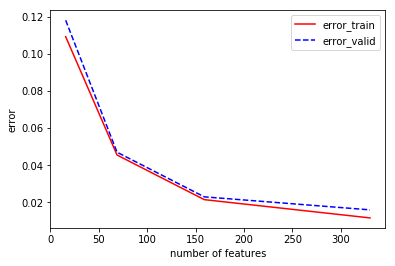

In [9]:
# Plot the results
plt.plot(x['count'], x['error_train'], 'r-', label = 'error_train')
plt.plot(x['count'], x['error_valid'], 'b--', label = 'error_valid')
plt.xlabel('number of features')
plt.ylabel('error')
plt.legend(loc='upper right')
plt.show()

## madelon

In [10]:
# Reading in the MADELON data set
X_train = pd.read_csv('madelon\madelon_train.data', header = None,\
                      delimiter = ' ').dropna(axis='columns')
Y_train = pd.read_csv('madelon\madelon_train.labels', header = None)

X_valid = pd.read_csv('madelon\madelon_valid.data', header = None, \
                      delimiter = ' ').dropna(axis='columns')
Y_valid = pd.read_csv('madelon\madelon_valid.labels', header = None)

#lambs = np.array([0.05, 0.042, 0.0231, 0])
lambs = np.array([0.05, 0.038, 0.02, 0.008])
error_results = np.array(np.zeros((lambs.size,4)))
i = 0
# Run logistic regression
for lamb in lambs:
    error_result = feature_selection(X_train, X_valid,\
                            Y_train, Y_valid, lamb, 100, -1)
    error_results[i] = error_result
    i += 1

x = pd.DataFrame(data = error_results, columns = ['lamb',\
                                'count', 'error_train', 'error_valid'])
x

,lamb,count,error_train,error_valid
0,0.050,4.0,0.3890,0.393333
1,0.038,6.0,0.3855,0.400000
2,0.020,67.0,0.3360,0.428333
3,0.008,279.0,0.2700,0.431667


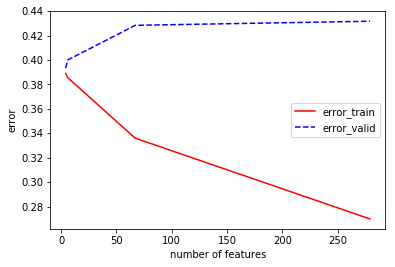

In [11]:
# Plot the results
plt.plot(x['count'], x['error_train'], 'r-', label = 'error_train')
plt.plot(x['count'], x['error_valid'], 'b--', label = 'error_valid')
plt.xlabel('number of features')
plt.ylabel('error')
plt.legend(loc='right')
plt.show()

## dexter

In [12]:
# Reading in the dexter data set
X_train = pd.read_csv('dexter\dexter_train.csv', header = None)\
                      .dropna(axis='columns')
Y_train = pd.read_csv('dexter\dexter_train.labels', header = None)

X_valid = pd.read_csv('dexter\dexter_valid.csv', header = None)\
                      .dropna(axis='columns')
Y_valid = pd.read_csv('dexter\dexter_valid.labels', header = None)

#lambs = np.array([0.235, 0.185, 0.12, 0.09])
lambs = np.array([0.17, 0.10, 0.08, 0.05])
error_results = np.array(np.zeros((lambs.size,4)))
i = 0
# Run logistic regression
for lamb in lambs:
    error_result = feature_selection(X_train, X_valid,\
                            Y_train, Y_valid, lamb, 100, -1)
    error_results[i] = error_result
    i += 1

x = pd.DataFrame(data = error_results, columns = ['lamb',\
                                'count', 'error_train', 'error_valid'])
x

,lamb,count,error_train,error_valid
0,0.17,3.0,0.270000,0.286667
1,0.10,31.0,0.063333,0.133333
2,0.08,96.0,0.026667,0.100000
3,0.05,850.0,0.000000,0.093333


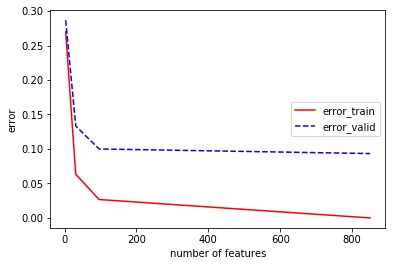

In [13]:
# Plot the results
plt.plot(x['count'], x['error_train'], 'r-', label = 'error_train')
plt.plot(x['count'], x['error_valid'], 'b--', label = 'error_valid')
plt.xlabel('number of features')
plt.ylabel('error')
plt.legend(loc='right')
plt.show()